# SimEx VSL
This notebook runs `sumo_simulator_vsl` function which uses defined VLS. More details can be found in the `simulator.py` definition of this function.

For running SUMO adjust the path in the `global_settings.py` file. The global_settings.py file also contains the parameters to be set for the simulation such as interval list. The following loop runs the selected sumo simulation for selected modifiers in the loop until it approximate every region or reaches the minimum step.
The sumo simulation function is defined in the `simulator.py` file.

## Important settings
1. Adjust the sumo path.
2. Setting the min/max domain interval and increment unit for the modifiers.
3. Setting the threshold for the validator and validator graph values.
4. Settings for the final plot with overall curves:
```python
"""Define variables for the settings of the Simex

    Attributes:
    instance_name (str): The settings instance name. No default value.
    do_plot: (bool): Enables plot in the modifier of the final modifier points. Default value is 'False'.
    extensive_search (bool): Enables complete exploration by setting modifier_data_point to 1 and enabling extensive iteration. Default value is 'False'.
    extensive_iteration (bool): Gets enabled when extensive search is True (TODO: Refactor) . Default value is 'False'.
    SimEx_mode (str): The mode of simex only exploration implemented. Default value 'exploration'.
    max_workers (int): The maximum number of parallel workers. Default value is '14'.
    domain_min_interval (int): The minimum of the input domain. Default value is '2500'
    domain_max_interval (int): The maximum of the input domain. Default value is '4000'
    modifier_incremental_unit (int): Minimal incremental unit is the smallest allowed step_size. Default value is set to '25'. Note: If extensive search True then minimal increment is set to '1'.
    modifier_data_point (int): Data point step size on the X axis in the first round. Default value is set to '100'. In next iterations modifier_data_point = modifier_data_point - modifier_incremental_unit until modifier_data_point < minimal_increment_unit.
    add_first_last_point (bool): Adding first and last point of the interval generated by the modifier. Default value is set to 'True'. Note: Smoothens the final function.
    vfs_threshold_y_fitting (int): Threshold on the y axis defining the objective function. Default value is set to '15'.
    vfs_threshold_x_interval (float): For unfit point expand by threshold_x_interval to each side to close unfit interval. Default value is set to '0.80'
    vfs_degree (int): Minimum degree for exploration. We start with polyfit in x^degree. Default value is set to '2'.
    vfs_max_deg (int): Max degree for exploration to which degree we try to fit function x^max_degree. Default value is set to '9'.
    vfs_early_stop (bool): If early_stop = True and improvement is not acceptable by increasing dimension, we stop. Default value set to 'True'.
    vfs_improvement_threshold (float): Sufficient improvement threshold (previous_mse - current_mse) >= improvement_threshold. Default value is set to '0.1'.
    vfs_penality_weight (int): Penalty for MSE to avoid overfitting with high dimension polynomial. Default value is set to '1'.
    vfs_x_labels (str): X axis label name validator graph. Default value is set to 'Traffic volume [veh/h]'.
    vfs_y_labels (str): Y axis label name validator graph. Default value is set to 'TTS [veh$\cdot$h]'.
    vfs_title (str): Title for validator graph. Default value is set to 'Fitted Curve with unfit Intervals for {self.instance_name}'.
    vfs_figsize_x (int): X size of the figure. Default value is set to '12'.
    vfs_figsize_y (int): Y size of the figure. Default value is set to '6'.
    vfs_font_size (int): Font size validator graph. Default value is set to '12'.
    ops_x_labels (str): X labels on the final graph. Default value is set to 'Traffic volume [veh/h]'.
    ops_y_labels (str): Y labels on the final graph. Default value is set to 'TTS [veh$\cdot$h]'.
    ops_title (str): Title on the final graph. Default value is set to 'Optimal Curve for {self.instance_name}'.
    ops_figsize_x (int): Figure size on the final graph. Default value is set to '10'.
    ops_figsize_y (int): Figure size on the final graph. Default value is set to '5'.
    ops_linewidth (int): Linewidth on the final graph. Default value is set to '3'.
    ops_number_x_points (int): Number of x axis points for the final graph. Default value is set to '400'.
    ops_predicted_points (bool): Display predicted points on the final graph. Default value is set to 'True'.
    ops_sigmoid_tailing (bool): Enable sigmoid tailing smoothener. Default value is set to 'True'.
    ops_sigmoid_width (int): Sigmoid width for the sigmoid smoothening. Default value is set to '15'.
    ops_threshold_plot (bool): Plot y_threshold on the final graph. Default value is set to 'True'.
    results_dir (str): Name of the results directory. Default value is set to 'results_dir_{instance_name}-{timestamp}'.
    log_filename (str): Filename for the log file. Default name is set to 'LOG-{self.instance_name}'.
    csv_filename (str): Final csv filename with the results. Default name is set to 'simex_output-{instance_name}'.
    """
```



Running simex.
Instance name VSL_script
Results dir /home/amy/tmp/repos/SimEx/notebooks/results_dir_VSL_script-20240911-191202
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4000)
[MODC]: mod_ticks:  [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
Temp x: [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
[MODC]: mod_x:  [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]
[MODC]: mod_x:  {14}
MAIN mod outcome ([[2500.0, 2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0, 4000.0]], [[2500, 4000]])
Simul

Step #5400.00 (16ms ~= 15.62*RT, ~14875.00UPS, TraCI: 0ms, vehicles TOT 6089 ACT 238 BUF 0 #4500.00 (20ms ~= 12.50*RT, ~13300.00UPS, TraCI: 1ms, vehicles TOT 5225 ACT 266 BUF 0


Step #5400.00 (21ms ~= 11.90*RT, ~11380.95UPS, TraCI: 1ms, vehicles TOT 5999 ACT 239 BUF 0p #3375.00 (53ms ~= 4.72*RT, ~9037.74UPS, TraCI: 3ms, vehicles TOT 4452 ACT 479 BUF 0)  #4500.00 (35ms ~= 7.14*RT, ~7742.86UPS, TraCI: 1ms, vehicles TOT 5150 ACT 271 BUF 0) 
Step #5400.00 (25ms ~= 10.00*RT, ~10160.00UPS, TraCI: 1ms, vehicles TOT 6269 ACT 254 BUF 0


Step #4325.00 (31ms ~= 8.06*RT, ~22451.61UPS, TraCI: 1ms, vehicles TOT 6005 ACT 696 BUF 0)

Step #5400.00 (20ms ~= 12.50*RT, ~13350.00UPS, TraCI: 0ms, vehicles TOT 6359 ACT 267 BUF 0


Step #5400.00 (20ms ~= 12.50*RT, ~13500.00UPS, TraCI: 1ms, vehicles TOT 6539 ACT 270 BUF 0
tep #4400.00 (28ms ~= 8.93*RT, ~24035.71UPS, TraCI: 1ms, vehicles TOT 6138 ACT 673 BUF 0)

F 0375.00 (33ms ~= 7.58*RT, ~17151.52UPS, TraCI: 2ms, vehicles TOT 4565 ACT 566 BUF 0)

Step #5400.00 (20ms ~= 12.50*RT, ~14100.00UPS, TraCI: 1ms, vehicles TOT 6719 ACT 282 BUF 0


Step #5400.00 (20ms ~= 12.50*RT, ~14350.00UPS, TraCI: 1ms, vehicles TOT 6809 ACT 287 BUF 0
Step #5400.00 (17ms ~= 14.71*RT, ~17235.29UPS, TraCI: 1ms, vehicles TOT 6989 ACT 293 BUF 0ACT 545 BUF 0


Step #5400.00 (16ms ~= 15.62*RT, ~27250.00UPS, TraCI: 0ms, vehicles TOT 7349 ACT 436 BUF 0
Step #5400.00 (8ms ~= 31.25*RT, ~49625.00UPS, TraCI: 0ms, vehicles TOT 7169 ACT 397 BUF 0)
ep #1125.00 (20ms ~= 12.50*RT, ~18950.00UPS, TraCI: 1ms, vehicles TOT 1437 ACT 379 BUF 0ep #2250.00 (7ms ~= 35.71*RT, ~79428.57UPS, TraCI: 0ms, vehicles TOT 3138 ACT 556 BUF 0)

 #3375.00 (10ms ~= 25.00*RT, ~73700.00UPS, TraCI: 1ms, vehicles TOT 4790 ACT 737 BUF 0

CT 759 BUF 0 (11ms ~= 22.73*RT, ~62909.09UPS, TraCI: 0ms, vehicles TOT 6114 ACT 692 BUF 0

Step #5400.00 (7ms ~= 35.71*RT, ~65571.43UPS, TraCI: 0ms, vehicles TOT 7529 ACT 459 BUF 0)


Step #5400.00 (6ms ~= 41.67*RT, ~79000.00UPS, TraCI: 0ms, vehicles TOT 7707 ACT 474 BUF 0)
Simulation output: [339.29166666666674, 346.1388888888888, 361.94444444444434, 372.5, 395.5555555555556, 400.5138888888888, 415.4722222222221, 429.7361111111112, 454.18055555555554, 503.1249999999999, 546.1249999999998, 584.8194444444443, 678.402777777778, 730.6944444444441, 784.5833333333333, 812.4166666666666]
MODX [2500.0, 2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0, 4000.0] and sim_y_list [339.29166666666674, 346.1388888888888, 361.94444444444434, 372.5, 395.5555555555556, 400.5138888888888, 415.4722222222221, 429.7361111111112, 454.18055555555554, 503.1249999999999, 546.1249999999998, 584.8194444444443, 678.402777777778, 730.6944444444441, 784.5833333333333, 812.4166666666666]
MAIN modx [

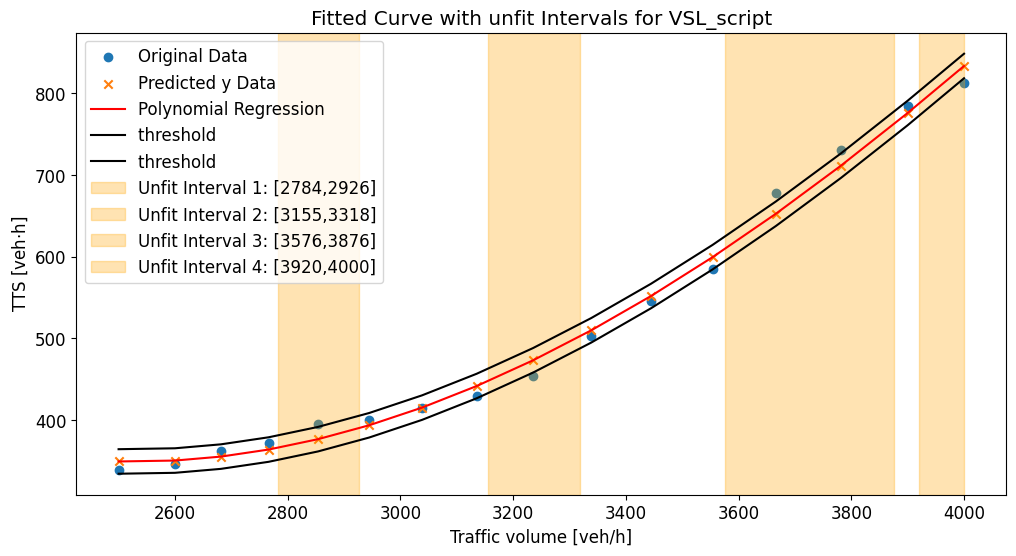

MAIN interval list from VAL: [[2783.6923076923076, 2926.4615384615386], [3155.3846153846152, 3317.846153846154], [3576.3076923076924, 3876.3076923076924], [3920.0, 4000.0]]
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (2783.6923076923076, 2926.4615384615386)
[MODC]: mod_ticks:  [2800, 2875]
Temp x: [2800, 2875]
[MODC]: mod_x:  [2800.0, 2875.0]
[MODC]: mod_x:  {2}
[MODC]: (interval_min_tick, interval_max_tick):  (3155.3846153846152, 3317.846153846154)
[MODC]: mod_ticks:  [3175, 3250]
Temp x: [3175, 3250]
[MODC]: mod_x:  [3175.0, 3250.0]
[MODC]: mod_x:  {2}
[MODC]: (interval_min_tick, interval_max_tick):  (3576.3076923076924, 3876.3076923076924)
[MODC]: mod_ticks:  [3625, 3700, 3775, 3850]
Temp x: [3625, 3700, 3775, 3850]
[MODC]: mod_x:  [3625.0, 3698.494983277592, 3773.494983277592, 3850.0]
[MODC]: mod_x:  {4}
[MODC]: (interval_min_tick, interval_max_tick):  (3920.0, 4000.0)
[MODC]: mod_ticks:  [3925]
Temp x: [3925]
[MODC]: mod_x:  [3925]
[MODC]: mod_x:  {1}
MAIN mod out

p #2250.00 (28ms ~= 8.93*RT, ~18464.29UPS, TraCI: 0ms, vehicles TOT 3063 ACT 517 BUF 0)Step #3550.00 (34ms ~= 7.35*RT, ~22323.53UPS, TraCI: 0ms, vehicles TOT 4999 ACT 759 BUF 0)

tep #3750.00 (33ms ~= 7.58*RT, ~23151.52UPS, TraCI: 1ms, vehicles TOT 5300 ACT 764 BUF 0)

tep #3800.00 (33ms ~= 7.58*RT, ~22969.70UPS, TraCI: 1ms, vehicles TOT 5377 ACT 758 BUF 0)

tep #3850.00 (33ms ~= 7.58*RT, ~23000.00UPS, TraCI: 1ms, vehicles TOT 5454 ACT 759 BUF 0)

 len 90x list [3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0, 3920.0]
Running sumo simulator
 Retrying in 1 seconds
Step #5400.00 (30ms ~= 8.33*RT, ~8000.00UPS, TraCI: 2ms, vehicles TOT 5909 ACT 240 BUF 0) 


 len 90x list [3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925, 3925]
Running sumo simulator
 Retrying in 1 seconds
Step #5400.00 (15ms ~= 16.67*RT, ~14533.33UPS, TraCI: 1ms, vehicles TOT 5819 ACT 218 BUF 0


Step #4475.00 (23ms ~= 10.87*RT, ~15043.48UPS, TraCI: 0ms, vehicles TOT 5641 ACT 346 BUF 0

 len 90x list [4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0]
Running sumo simulator
 Retrying in 1 seconds
Step #5400.00 (38ms ~= 6.58*RT, ~6289.47UPS, TraCI: 4ms, vehicles TOT 6089 ACT 239 BUF 0) 


Step #5400.00 (35ms ~= 7.14*RT, ~7085.71UPS, TraCI: 5ms, vehicles TOT 5999 ACT 248 BUF 0) 


tep #3925.00 (53ms ~= 4.72*RT, ~14339.62UPS, TraCI: 0ms, vehicles TOT 5630 ACT 760 BUF 0)

tep #4350.00 (55ms ~= 4.55*RT, ~12000.00UPS, TraCI: 3ms, vehicles TOT 5998 ACT 660 BUF 0)

Step #5400.00 (19ms ~= 13.16*RT, ~14000.00UPS, TraCI: 1ms, vehicles TOT 6449 ACT 266 BUF 0


Step #5400.00 (35ms ~= 7.14*RT, ~7400.00UPS, TraCI: 5ms, vehicles TOT 6539 ACT 259 BUF 0) 
Step #5400.00 (19ms ~= 13.16*RT, ~14368.42UPS, TraCI: 1ms, vehicles TOT 6449 ACT 273 BUF 0


Step #5400.00 (20ms ~= 12.50*RT, ~13950.00UPS, TraCI: 1ms, vehicles TOT 6629 ACT 279 BUF 0


tep #4325.00 (31ms ~= 8.06*RT, ~22354.84UPS, TraCI: 0ms, vehicles TOT 6185 ACT 693 BUF 0)

Step #1100.00 (24ms ~= 10.42*RT, ~15416.67UPS, TraCI: 1ms, vehicles TOT 1402 ACT 370 BUF 0

Step #5400.00 (25ms ~= 10.00*RT, ~12280.00UPS, TraCI: 1ms, vehicles TOT 7079 ACT 307 BUF 0


Step #5400.00 (27ms ~= 9.26*RT, ~13037.04UPS, TraCI: 1ms, vehicles TOT 7079 ACT 352 BUF 0)


Step #5400.00 (26ms ~= 9.62*RT, ~17115.38UPS, TraCI: 1ms, vehicles TOT 7259 ACT 445 BUF 0)


Step #5400.00 (15ms ~= 16.67*RT, ~29333.33UPS, TraCI: 1ms, vehicles TOT 7439 ACT 440 BUF 0
Step #5400.00 (21ms ~= 11.90*RT, ~20761.90UPS, TraCI: 1ms, vehicles TOT 7349 ACT 436 BUF 0
Step #5400.00 (19ms ~= 13.16*RT, ~23947.37UPS, TraCI: 1ms, vehicles TOT 7529 ACT 455 BUF 0tep #1125.00 (24ms ~= 10.42*RT, ~14416.67UPS, TraCI: 0ms, vehicles TOT 1400 ACT 346 BUF 0Step #5000.00 (14ms ~= 17.86*RT, ~37357.14UPS, TraCI: 1ms, vehicles TOT 7040 ACT 523 BUF 0
Step #2225.00 (23ms ~= 10.87*RT, ~23956.52UPS, TraCI: 1ms, vehicles TOT 3101 ACT 551 BUF 0

Step #3350.00 (16ms ~= 15.62*RT, ~42625.00UPS, TraCI: 1ms, vehicles TOT 4751 ACT 682 BUF 00

Step #4825.00 (18ms ~= 13.89*RT, ~31111.11UPS, TraCI: 1ms, vehicles TOT 6799 ACT 560 BUF 0

Step #4925.00 (23ms ~= 10.87*RT, ~23434.78UPS, TraCI: 1ms, vehicles TOT 6917 ACT 539 BUF 0

Step #5400.00 (15ms ~= 16.67*RT, ~30800.00UPS, TraCI: 0ms, vehicles TOT 7529 ACT 462 BUF 0


Step #5400.00 (17ms ~= 14.71*RT, ~27470.59UPS, TraCI: 0ms, vehicles TOT 7529 ACT 467 BUF 0


Step #5400.00 (6ms ~= 41.67*RT, ~79000.00UPS, TraCI: 1ms, vehicles TOT 7707 ACT 474 BUF 0)
Simulation output: [370.48611111111126, 378.2777777777777, 390.90277777777777, 395.30555555555566, 447.0416666666667, 437.3611111111109, 451.2916666666669, 495.9583333333333, 648.25, 604.8472222222223, 717.555555555556, 746.9166666666669, 776.7499999999999, 780.1250000000005, 756.2083333333334, 760.680555555556, 812.4166666666666]
MODX [2783.6923076923076, 2800.0, 2875.0, 2926.4615384615386, 3155.3846153846152, 3175.0, 3250.0, 3317.846153846154, 3576.3076923076924, 3625.0, 3698.494983277592, 3773.494983277592, 3850.0, 3876.3076923076924, 3920.0, 3925, 4000.0] and sim_y_list [370.48611111111126, 378.2777777777777, 390.90277777777777, 395.30555555555566, 447.0416666666667, 437.3611111111109, 451.2916666666669, 495.9583333333333, 648.25, 604.8472222222223, 717.555555555556, 746.9166666666669, 776.7499999999999, 780.1250000000005, 756.2083333333334, 760.680555555556, 812.4166666666666]
MAIN modx [278

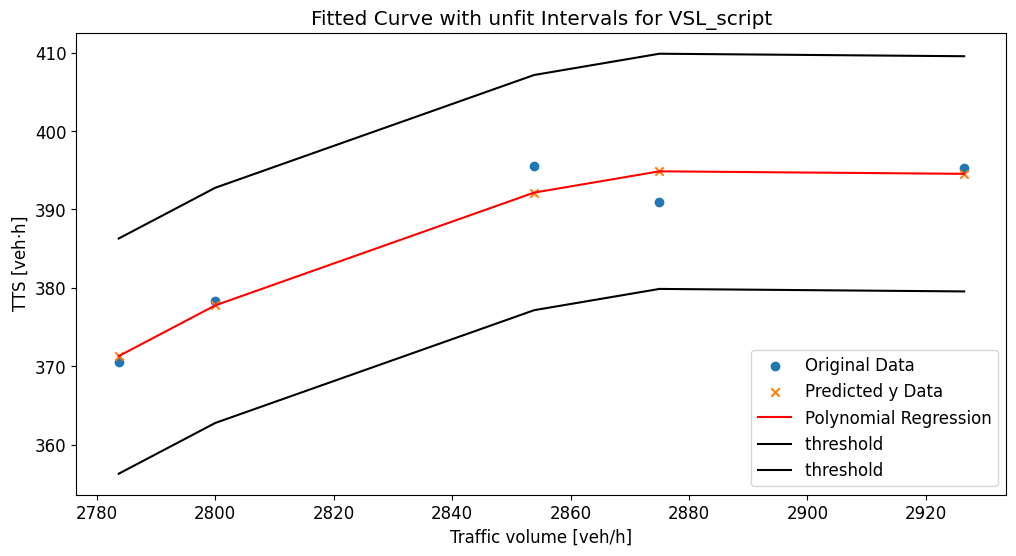

equation,
 y =  -0.0018516954172563382x^2 + 10.736329352374373x^1  -15166.681208259974 
unfit_points
 [(2783.6923076923076, 370.48611111111126), (2800.0, 378.2777777777777), (2853.846153846154, 395.5555555555556), (2875.0, 390.90277777777777), (2926.4615384615386, 395.30555555555566)] 
local_unfit_interval
, [[2783.6923076923076, 2926.4615384615386]]
       *** USING local_exploration_validator_A


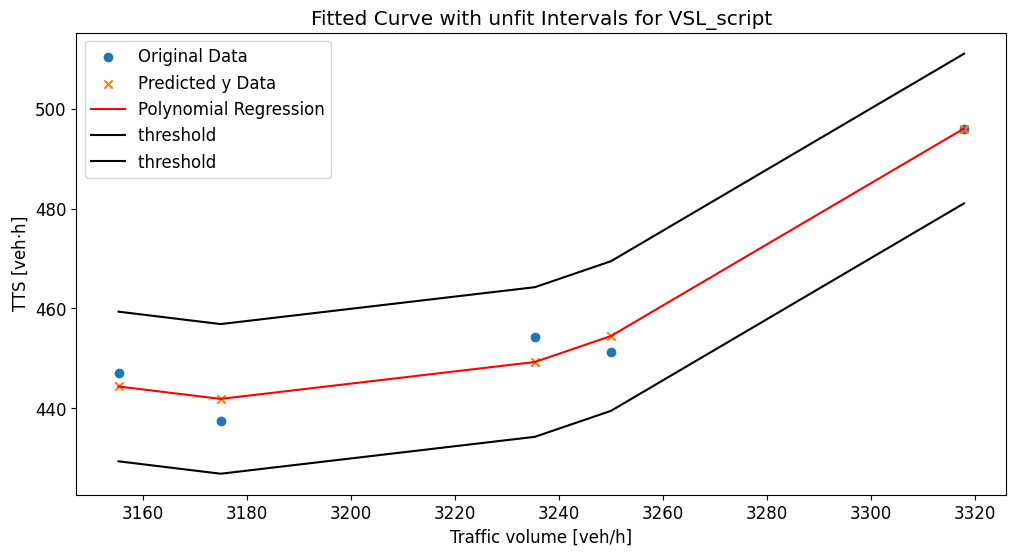

equation,
 y =  0.0031157137424687046x^2  -19.8504222481807x^1 + 32058.578211911845 
unfit_points
 [(3155.3846153846152, 447.0416666666667), (3175.0, 437.3611111111109), (3235.3846153846152, 454.18055555555554), (3250.0, 451.2916666666669), (3317.846153846154, 495.9583333333333)] 
local_unfit_interval
, [[3155.3846153846152, 3317.846153846154]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3576.3076923076924, 3576.3076923076924]]


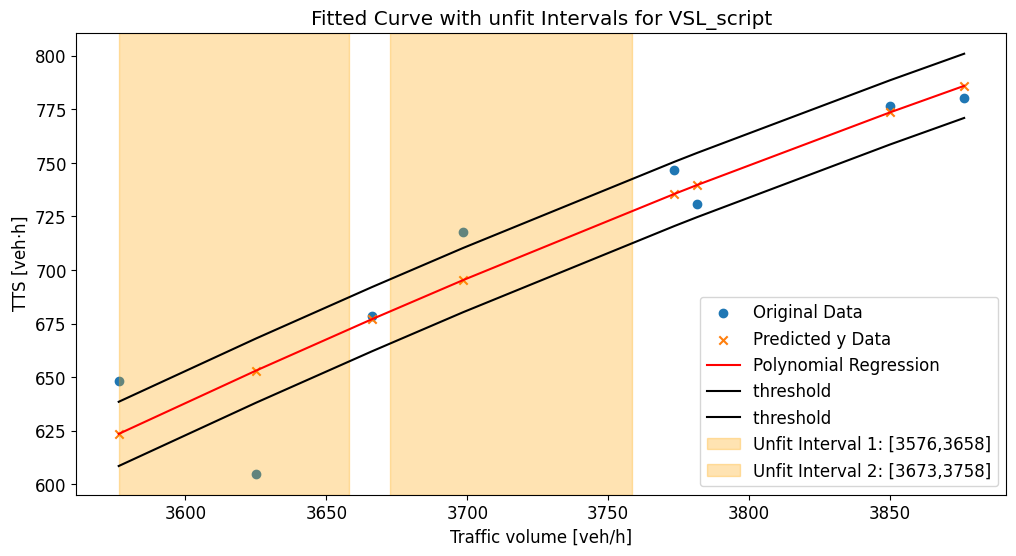

equation,
 y =  -0.00025850046101935355x^2 + 2.468375015645982x^1  -4898.010352507265 
unfit_points
 [(3576.3076923076924, 648.25), (3625.0, 604.8472222222223), (3666.153846153846, 678.402777777778), (3698.494983277592, 717.555555555556), (3773.494983277592, 746.9166666666669), (3781.5384615384614, 730.6944444444441), (3850.0, 776.7499999999999), (3876.3076923076924, 780.1250000000005)] 
local_unfit_interval
, [[3576.3076923076924, 3576.3076923076924], [3657.923076923077, 3672.6220735785955], [3758.494983277592, 3876.3076923076924]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


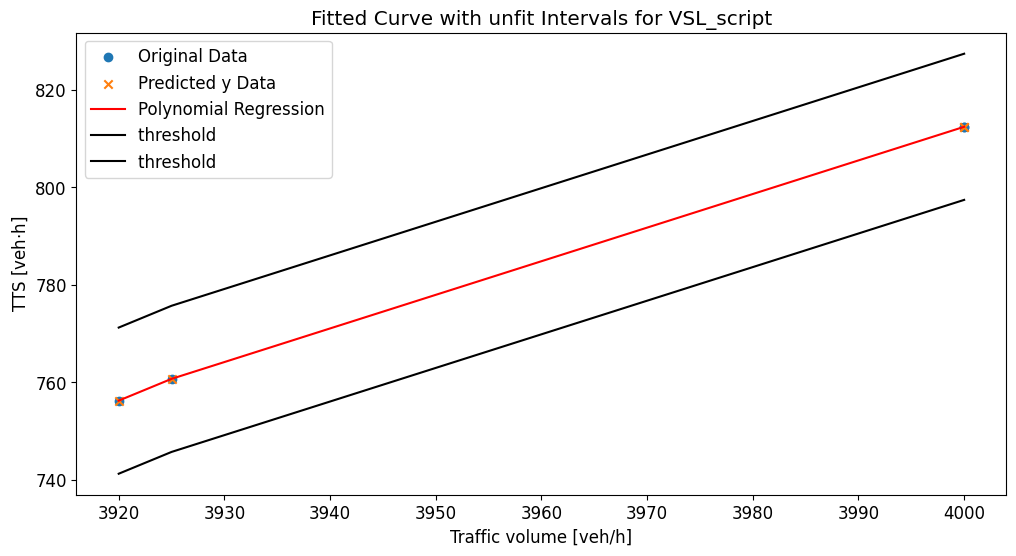

equation,
 y =  -1.3667507951416486e-18x^6 + 1.1316870225184609e-16x^5 + 1.371939577045923e-11x^4 + 7.218926518975411e-08x^3 + 0.00021711199458611616x^2 + 0.027938348689669622x^1  -5423.080425057394 
unfit_points
 [(3920.0, 756.2083333333334), (3925.0, 760.680555555556), (4000.0, 812.4166666666666), (4000.0, 812.4166666666666)] 
local_unfit_interval
, [[3920.0, 4000.0]]
DIFFERENCES 
each_interval  [3920.0, 4000.0] 
new_unfit_interval   []
MAIN interval list from VAL: [[3576.3076923076924, 3657.923076923077], [3672.6220735785955, 3758.494983277592]]
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (3576.3076923076924, 3657.923076923077)
[MODC]: mod_ticks:  [3600, 3650]
Temp x: [3600, 3650]
[MODC]: mod_x:  [3600.0, 3650.0]
[MODC]: mod_x:  {2}
[MODC]: (interval_min_tick, interval_max_tick):  (3672.6220735785955, 3758.494983277592)
[MODC]: mod_ticks:  [3700, 3750]
Temp x: [3700, 3750]
[MODC]: mod_x:  [3700.0, 3750.0]
[MODC]: mod_x:  {2}
MAIN mod outcome ([[3576.3076923076924, 3

Step #4475.00 (37ms ~= 6.76*RT, ~16243.24UPS, TraCI: 0ms, vehicles TOT 6089 ACT 601 BUF 0)Step #4275.00 (31ms ~= 8.06*RT, ~22193.55UPS, TraCI: 1ms, vehicles TOT 5971 ACT 688 BUF 0)

Step #4475.00 (32ms ~= 7.81*RT, ~17843.75UPS, TraCI: 0ms, vehicles TOT 6014 ACT 571 BUF 0)

 0)F 0)

Step #4475.00 (31ms ~= 8.06*RT, ~21161.29UPS, TraCI: 1ms, vehicles TOT 6206 ACT 656 BUF 0)

Step #5400.00 (15ms ~= 16.67*RT, ~24800.00UPS, TraCI: 1ms, vehicles TOT 7169 ACT 372 BUF 0
Step #5400.00 (17ms ~= 14.71*RT, ~18882.35UPS, TraCI: 0ms, vehicles TOT 7079 ACT 321 BUF 0
Step #5400.00 (26ms ~= 9.62*RT, ~13538.46UPS, TraCI: 1ms, vehicles TOT 7079 ACT 352 BUF 0)
Step #5400.00 (24ms ~= 10.42*RT, ~16625.00UPS, TraCI: 1ms, vehicles TOT 7169 ACT 399 BUF 0
Step #5400.00 (17ms ~= 14.71*RT, ~24705.88UPS, TraCI: 1ms, vehicles TOT 7169 ACT 420 BUF 0
Step #5400.00 (15ms ~= 16.67*RT, ~29600.00UPS, TraCI: 0ms, vehicles TOT 7349 ACT 444 BUF 0
Step #5400.00 (23ms ~= 10.87*RT, ~18826.09UPS, TraCI: 0ms, vehicles TOT 7349 ACT 433 BUF 0
Step #5400.00 (22ms ~= 11.36*RT, ~19681.82UPS, TraCI: 1ms, vehicles TOT 7259 ACT 433 BUF 0
Simulation output: [648.25, 635.0277777777777, 659.9583333333333, 689.9027777777778, 639.3888888888885, 699.5972222222224, 717.1249999999998, 728.3888888888887]
MODX [3576.3076923076924, 3600.0, 3650.0, 3657.923076923077, 3672.6220735785955, 3700.0, 3750.0, 3758.494983277

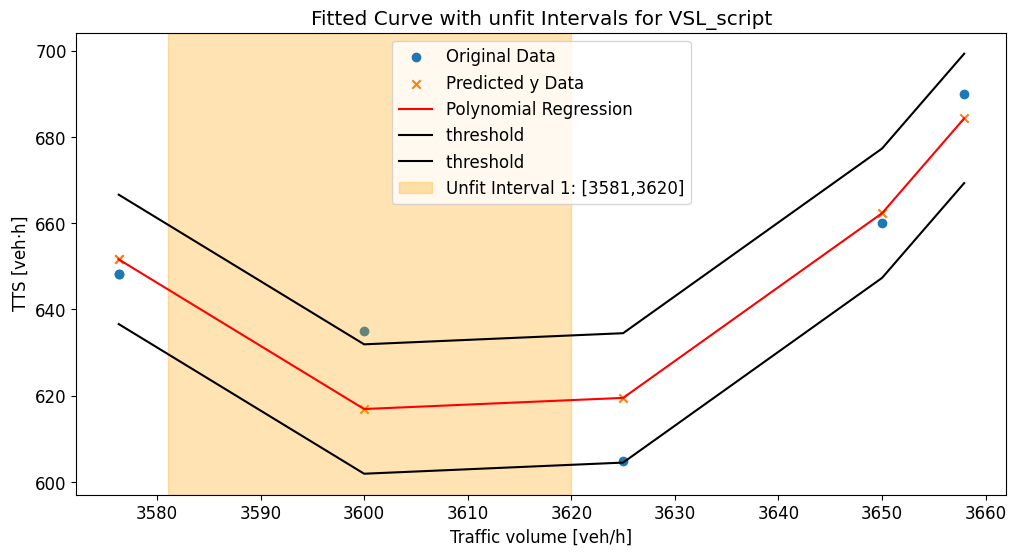

equation,
 y =  0.03219574084411185x^2  -232.51098700681482x^1 + 420399.6650145775 
unfit_points
 [(3576.3076923076924, 648.25), (3576.3076923076924, 648.25), (3600.0, 635.0277777777777), (3625.0, 604.8472222222223), (3650.0, 659.9583333333333), (3657.923076923077, 689.9027777777778)] 
local_unfit_interval
, [[3576.3076923076924, 3581.046153846154], [3620.0, 3657.923076923077]]
       *** USING local_exploration_validator_A


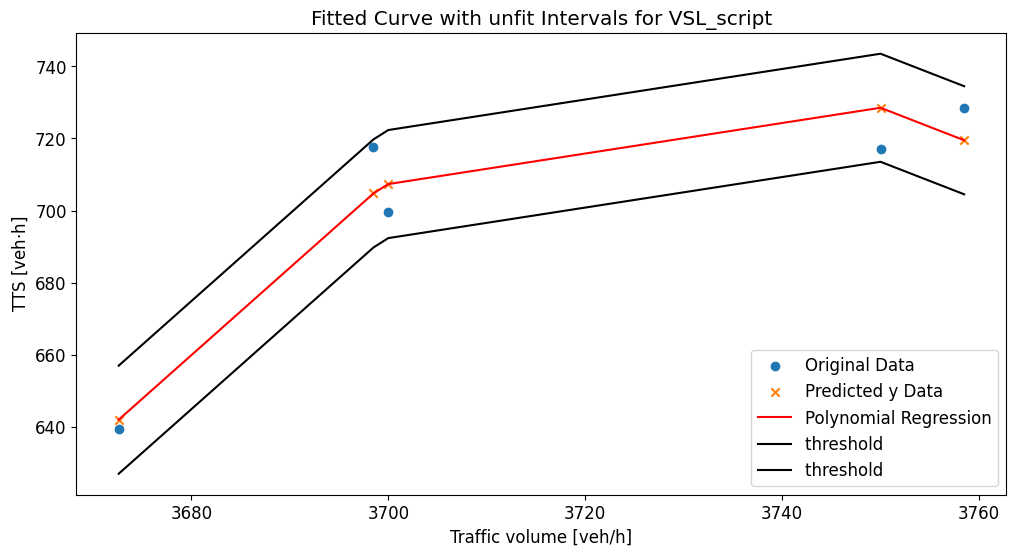

equation,
 y =  -0.025396762914806727x^2 + 189.6295790568597x^1  -353240.4152739657 
unfit_points
 [(3672.6220735785955, 639.3888888888885), (3698.494983277592, 717.555555555556), (3700.0, 699.5972222222224), (3750.0, 717.1249999999998), (3758.494983277592, 728.3888888888887)] 
local_unfit_interval
, [[3672.6220735785955, 3758.494983277592]]
DIFFERENCES 
each_interval  [3672.6220735785955, 3758.494983277592] 
new_unfit_interval   []
MAIN interval list from VAL: [[3581.046153846154, 3620.0]]
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (3581.046153846154, 3620.0)
[MODC]: mod_ticks:  [3600]
Temp x: [3600]
[MODC]: mod_x:  [3600]
[MODC]: mod_x:  {1}
MAIN mod outcome ([[3581.046153846154, 3600, 3620.0]], [[3581.046153846154, 3620.0]])
Simulator...
[[3581.046153846154, 3600, 3620.0]]
 IN SIMULATE: [[3581.046153846154, 3600, 3620.0]]
Flatten mod_x [3581.046153846154, 3600, 3620.0]
 len 90x list [3581.046153846154, 3581.046153846154, 3581.046153846154, 3581.046153846154, 3581.0

/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


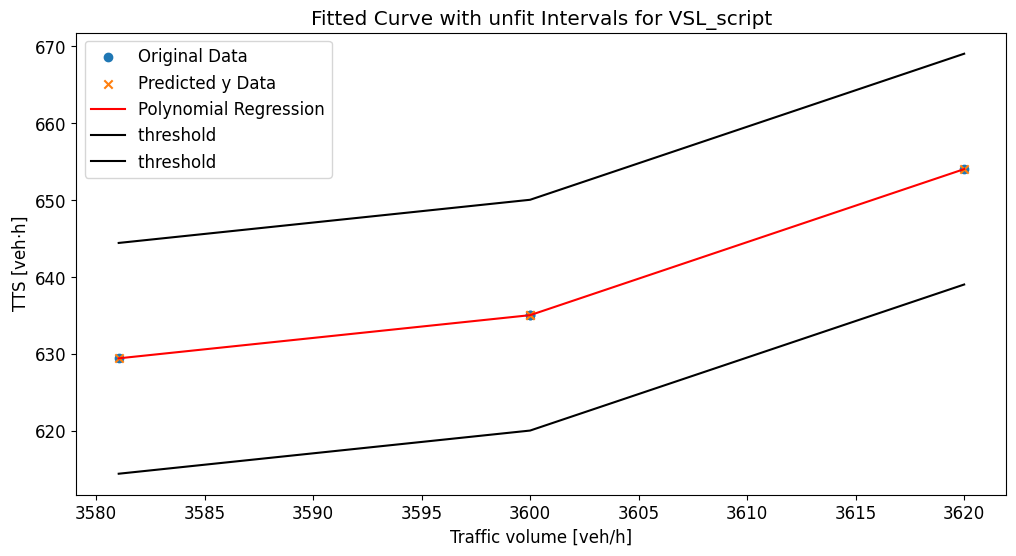

equation,
 y =  1.1717998802631549e-17x^6 + 1.9832575936332388e-16x^5  -9.006888866465311e-11x^4  -4.3349157961963394e-07x^3  -0.0011699356049379827x^2 + 0.01799645100626745x^1 + 25458.250973674643 
unfit_points
 [(3581.046153846154, 629.4166666666666), (3600.0, 635.0277777777777), (3600.0, 635.0277777777777), (3620.0, 654.0138888888893)] 
local_unfit_interval
, [[3581.046153846154, 3620.0]]
DIFFERENCES 
each_interval  [3581.046153846154, 3620.0] 
new_unfit_interval   []
MAIN interval list from VAL: []
FIT POINT: (2500.0, 339.29167)
FIT POINT: (2600.0, 346.13889)
FIT POINT: (2681.53846, 361.94444)
FIT POINT: (2766.15385, 372.5)
FIT POINT: (2800.0, 378.27778)
FIT POINT: (2853.84615, 395.55556)
FIT POINT: (2875.0, 390.90278)
FIT POINT: (2926.46154, 395.30556)
FIT POINT: (2944.61538, 400.51389)
FIT POINT: (3038.46154, 415.47222)
FIT POINT: (3135.38462, 429.73611)
FIT POINT: (3175.0, 437.36111)
FIT POINT: (3235.38462, 454.18056)
FIT POINT: (3250.0, 451.29167)
FIT POINT: (3338.46154, 503.12

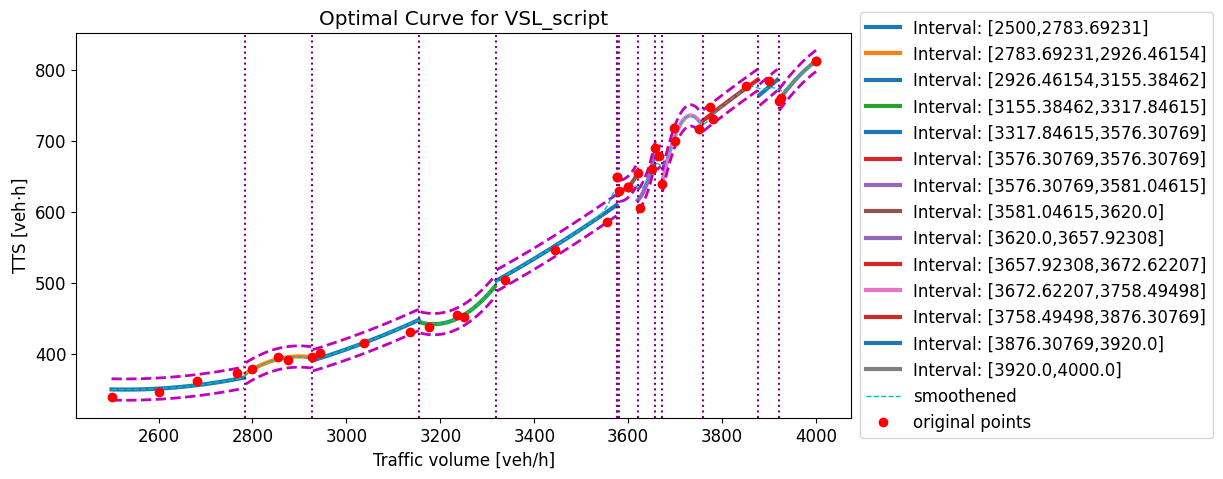

/home/amy/tmp/repos/SimEx/notebooks/results_dir_VSL_script-20240911-191202/simex_output-VSL_script-20240911-191202.csv
Run finished. CSV file is /home/amy/tmp/repos/SimEx/notebooks/results_dir_VSL_script-20240911-191202/simex_output-VSL_script-20240911-191202.csv
Run time: 47.70425803661347


In [1]:
from simulator import Simulator
from validator import Validator
from modifier import Modifier
from simex import run_simex
import time
before = time.time()
# Run simex
print("Running simex.")
base_file = run_simex(simulator_function=Simulator.sumo_simulator_vsl, modifier=Modifier.modifierA, validator=Validator.local_exploration_validator_A,instance_name='VSL_script')
print(f"Run finished. CSV file is {base_file}")
now = time.time()
print(f"Run time: {(now-before)/60}")